# <p style="text-align: center;">EE 379K: Data Science Laboratory</p>
# <p style="text-align: center;">Kaggle Midterm</p>
## <p style="text-align: center;">Lab Section: Wednesday 4:30-7:30pm</p>
## <p style="text-align: center;">Koger Darden (mkd788)</p>
## <p style="text-align: center;">https://www.kaggle.com/c/utdslabsp18</p>

## Understanding and cleaning the data  
I started out by taking a look at the raw data provided just to see what it looked like. I then took a look at some data summaries just to try to get a general understanding of the features I was working with.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import time

In [2]:
train = pd.read_csv('data/train_final.csv', index_col='id')
test = pd.read_csv('data/test_final.csv', index_col='id')
sample_sub = pd.read_csv('data/sample_submission.csv', index_col='id')

print("--- Training data summaries ---")
print(train.shape)
display(train.head())
print(train.describe())

print("\n--- Test data summaries ---")
print(test.shape)
display(test.head())
print(test.describe())

print("\n--- Sample submission ---")
print(sample_sub.shape)
display(sample_sub.head())

--- Training data summaries ---
(16383, 28)


,Y,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
id,,,,,,,,,,,,,,,,,,,,,
1,1,38733,61385,0,38,118751,1000,32020,1,121980,...,1,118830,1,1,126461,1,46871,NaN,NaN,NaN
2,1,34248,51329,0,41,120800,1000,130630,1,124029,...,1,118832,1,1,130296,1,42386,NaN,NaN,NaN
3,1,15830,5522,0,50,118779,1000,303218,2,122006,...,1,118832,1,2,127063,1,23968,NaN,NaN,NaN
4,1,19417,6754,0,45,123163,2000,19024,1,126391,...,1,118832,1,1,15274,1,27555,NaN,NaN,NaN
5,1,42122,16991,0,41,119193,1000,303218,1,122422,...,1,118832,1,1,133491,1,50260,NaN,NaN,NaN


                  Y             F1             F2            F3            F4  \
count  16383.000000   16383.000000   16383.000000  16383.000000  16383.000000   
mean       0.941464   44312.117256   26032.070927      0.048953     40.002991   
std        0.234762   34815.325971   35742.773305      0.281347      4.998992   
min        0.000000     999.000000      43.000000      0.000000     21.000000   
25%        1.000000   21896.000000    4603.000000      0.000000     37.000000   
50%        1.000000   36806.000000   13819.000000      0.000000     40.000000   
75%        1.000000   75414.000000   41799.500000      0.000000     43.000000   
max        1.000000  314150.000000  311733.000000      7.000000     59.000000   

                  F5            F6             F7            F8  \
count   16383.000000  1.638300e+04   16383.000000  16383.000000   
mean   121039.419459  6.272233e+03  201731.398767      1.043216   
std      5802.987367  1.124685e+05  100732.735724      0.249209   
mi

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24
id,,,,,,,,,,,,,,,,,,,,,
16384,27991,135396,0,33,120578,17000,143022,1,124156,140341,...,1,128168,121276,1,122084,1,1,127696,1,36129
16385,82444,54655,0,38,120064,18000,315517,1,123643,138050,...,1,121648,120763,1,119703,1,2,127441,1,90582
16386,37950,23477,1,27,120267,1000,142929,1,123845,137960,...,1,314350,120965,1,119703,1,1,127029,1,46088
16387,75000,92055,0,33,118844,2000,130186,1,183832,128090,...,1,140144,180952,1,118961,1,1,127973,1,83138
16388,84243,8156,0,40,136613,2000,132071,1,139841,128051,...,1,121642,136961,1,118832,1,1,126927,1,92381


                  F1             F2            F3           F4             F5  \
count   16385.000000   16385.000000  16385.000000  16385.00000   16385.000000   
mean    44448.549771   26000.523772      0.045041     40.02246  121078.815075   
std     33530.237849   36113.972804      0.246652      4.97626    5800.688469   
min       999.000000      43.000000      0.000000     21.00000  118751.000000   
25%     21996.000000    4579.000000      0.000000     37.00000  119296.000000   
50%     36964.000000   13437.000000      0.000000     40.00000  119917.000000   
75%     75754.000000   44040.000000      0.000000     43.00000  120822.000000   
max    314138.000000  311733.000000      5.000000     60.00000  271562.000000   

                 F6             F7            F8             F9  \
count  1.638500e+04   16385.000000  16385.000000   16385.000000   
mean   5.053976e+04  201535.984742      1.043760  130549.881294   
std    5.586112e+06  100678.757813      0.250198   30953.590171   
mi

,Y
id,
16384,1.0
16385,0.0
16386,1.0
16387,0.5
16388,0.5


It appears that **F25**, **F26**, and **F27** in the training set are just empty columns, so we will remove those.

In [3]:
# Remove null columns
train = train.dropna(axis=1, how='all')

### Data Visualization

I did some further visualization of the data using boxplots, histograms, and scatterplots to visually see the distribution of the features and see if there were any useful trends. I didn't see any useful info in the scatterplots, so since they took awhile to load, I stopped using them after inspecting them initially.

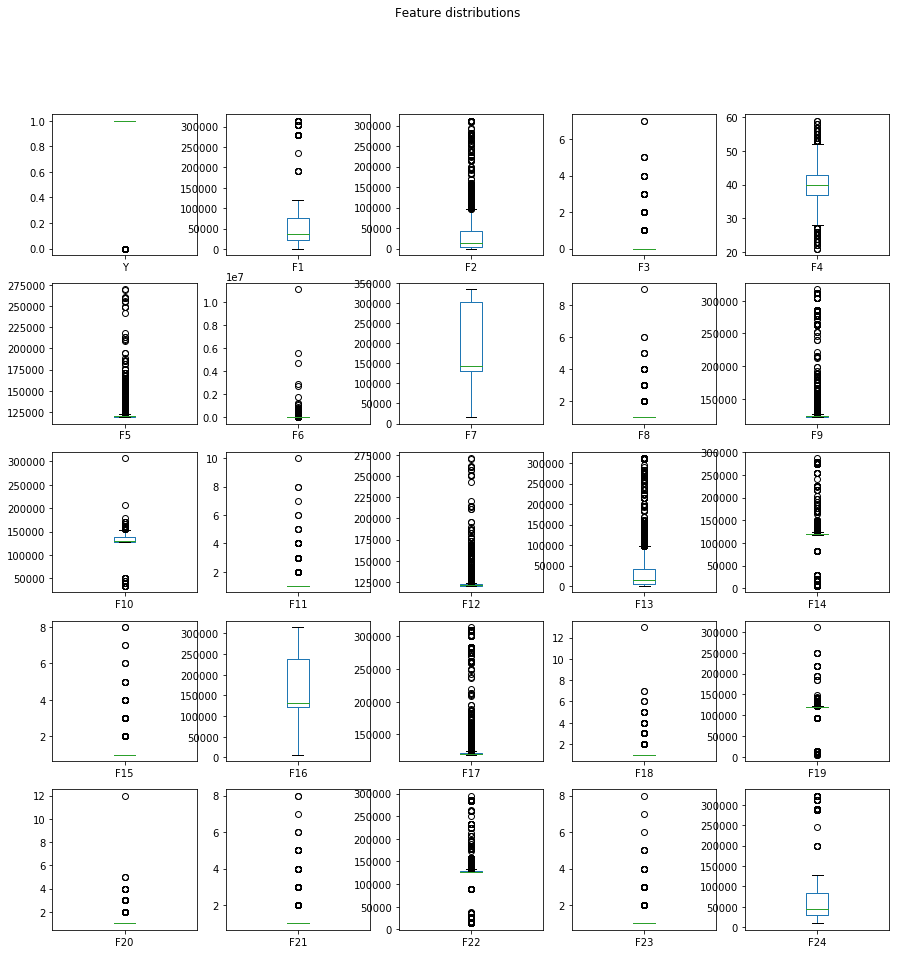

In [4]:
# Box whisker plots of data
train.plot(kind='box', subplots=True, title="Feature distributions", 
           layout=(5,5), sharex=False, sharey=False, figsize=(15, 15))
plt.show()

Train data


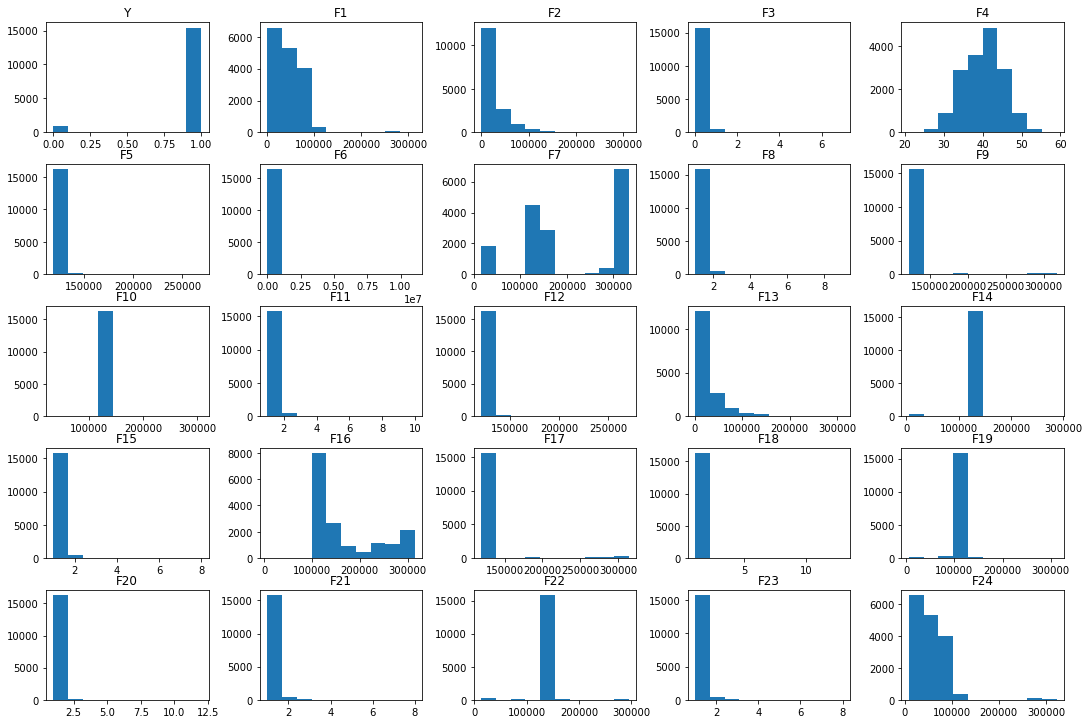

Test data


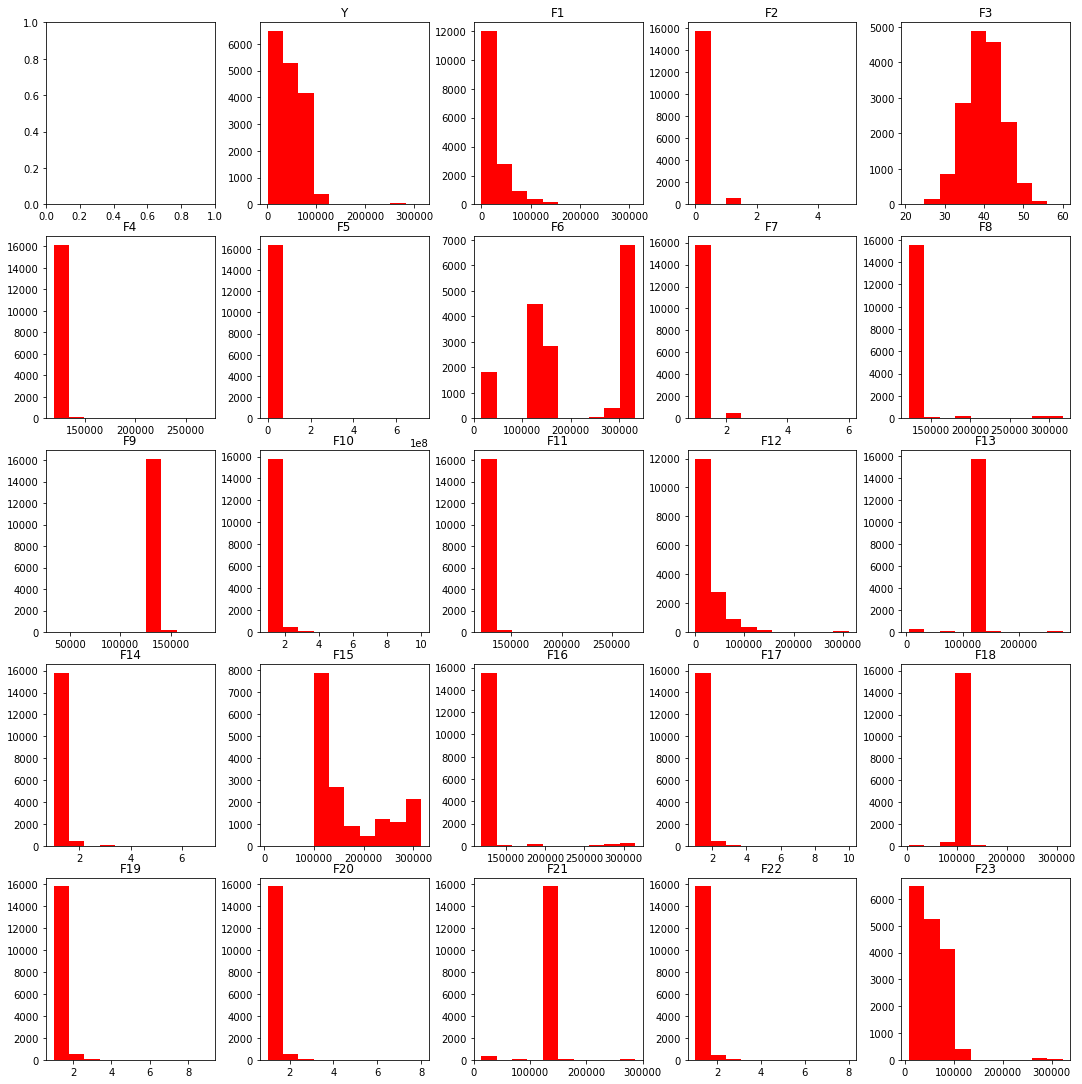

In [5]:
# Feature histograms

# Train data
print('Train data')

f, axarr = plt.subplots(5, 5, figsize=(15, 10))
f.tight_layout()
for i in range(len(train.columns)):
    axarr[int(i/5)][i%5].hist(train.iloc[:, i])
    axarr[int(i/5)][i%5].set_title(train.columns[i])
plt.show()

# Test data
print('Test data')
f, axarr = plt.subplots(5, 5, figsize=(15, 15))
f.tight_layout()
for i in range(1, len(test.columns)+1):
    axarr[int(i/5)][i%5].hist(test.iloc[:, i-1], color="red")
    axarr[int(i/5)][i%5].set_title(train.columns[i-1])
plt.show()

In [6]:
# Scatter plots
train_pos = train[(train['Y'] == 1)]
train_neg = train[(train['Y'] == 0)]

# Plot scatterplots to find feature correlations (change if statement to "if 1:" to use)
if 0:
    for i in range(1, train.shape[1]):
        for j in range (i+1, train.shape[1]):
            fig, ax = plt.subplots()
            ax.plot(train_pos.iloc[:, i], train_pos.iloc[:, j], marker='o', linestyle='', c='r', ms=6, label='1')
            ax.plot(train_neg.iloc[:, i], train_neg.iloc[:, j], marker='o', linestyle='', c='b', ms=6, label='0')
            ax.legend()
            plt.title("Columns {} and {}".format(i,j))
            plt.show()

### Exploring Correlation 

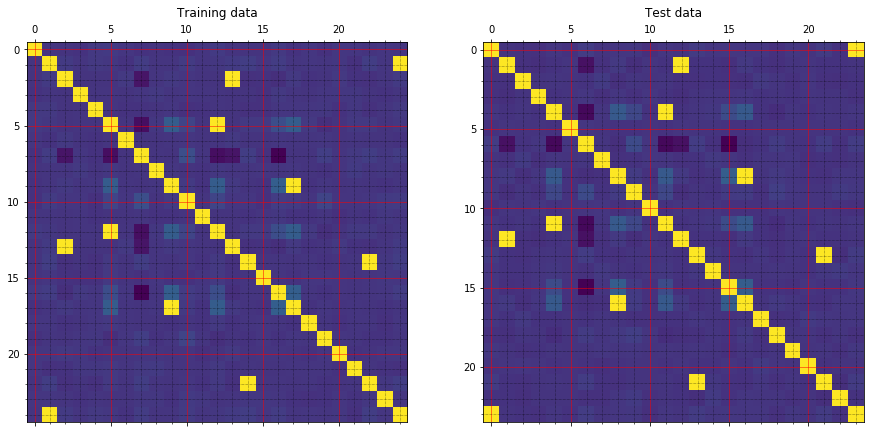

In [7]:
# Plot correlation matrices
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.matshow(train.corr())
ax2.matshow(test.corr())

# Customize the grid
ax1.set_title('Training data')
ax1.minorticks_on()
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax2.set_title('Test data')
ax2.minorticks_on()
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

It looks like highly correlated variables are as follows: **(F1, F24), (F2, F13), (F5, F12), (F9, F17), (F14, F22)**  
We can delete **F24, F13, F12, F17, F22** So that they don't double effect the variance of data during PCA.


In [8]:
# Drop highly correlated redundant data
drop_cols = ['F24', 'F13', 'F12', 'F17', 'F22']
train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

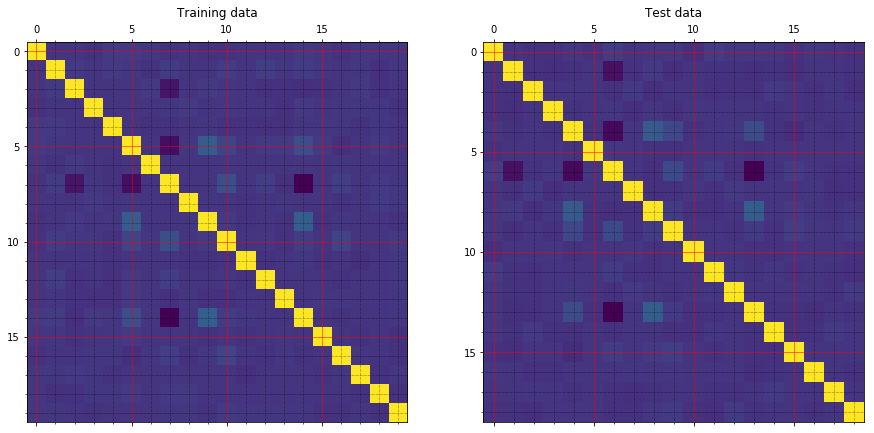

In [9]:
# Plot correlation matrices
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.matshow(train.corr())
ax2.matshow(test.corr())

# Customize the grid
ax1.set_title('Training data')
ax1.minorticks_on()
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax2.set_title('Test data')
ax2.minorticks_on()
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

Much better.

In [10]:
abs(train.corr())

,Y,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F14,F15,F16,F18,F19,F20,F21,F23
Y,1.000000,0.002246,0.001937,0.010216,0.014869,0.017641,0.006404,0.007767,0.004754,0.009172,0.014260,0.001229,0.005234,0.003820,0.014716,0.003873,0.012057,0.007981,0.004361,0.006969
F1,0.002246,1.000000,0.021099,0.001617,0.013458,0.009805,0.008771,0.030148,0.000271,0.001245,0.025177,0.000427,0.034025,0.003662,0.026863,0.003125,0.001193,0.009140,0.014095,0.003462
F2,0.001937,0.021099,1.000000,0.006220,0.002752,0.005207,0.015781,0.115176,0.002760,0.016569,0.004374,0.005914,0.013676,0.009738,0.022680,0.007837,0.003380,0.015126,0.008684,0.000675
F3,0.010216,0.001617,0.006220,1.000000,0.002240,0.001065,0.004685,0.005093,0.015097,0.001942,0.006098,0.000698,0.003613,0.012439,0.016249,0.005965,0.004481,0.007932,0.009936,0.007878
F4,0.014869,0.013458,0.002752,0.002240,1.000000,0.001278,0.010186,0.009524,0.004465,0.003596,0.014981,0.007960,0.011152,0.013689,0.006462,0.005253,0.010903,0.007670,0.008547,0.001041
F5,0.017641,0.009805,0.005207,0.001065,0.001278,1.000000,0.001294,0.136707,0.007538,0.163755,0.058626,0.004131,0.016191,0.015735,0.097540,0.012567,0.022459,0.003517,0.015316,0.005958
F6,0.006404,0.008771,0.015781,0.004685,0.010186,0.001294,1.000000,0.006299,0.003107,0.000843,0.004931,0.003090,0.003293,0.003643,0.006907,0.000551,0.002836,0.004096,0.001775,0.004254
F7,0.007767,0.030148,0.115176,0.005093,0.009524,0.136707,0.006299,1.000000,0.000852,0.005976,0.101342,0.001507,0.033427,0.013987,0.181867,0.005626,0.035806,0.000223,0.014008,0.009518
F8,0.004754,0.000271,0.002760,0.015097,0.004465,0.007538,0.003107,0.000852,1.000000,0.005676,0.003577,0.011024,0.000714,0.005831,0.001774,0.005501,0.006708,0.001205,0.016754,0.007937
F9,0.009172,0.001245,0.016569,0.001942,0.003596,0.163755,0.000843,0.005976,0.005676,1.000000,0.021060,0.008806,0.005221,0.009758,0.170075,0.006505,0.005044,0.002302,0.000900,0.009669


It looks like the features that are most correlated with Y only have a 0.014 - 0.018 correlation value.

## Feature Engineering

For feature engineering I tried multiplying features by other features, taking the log of features, dummy encoding features that could potentially be categorical, and performing PCA and LDA.  

For multiplying features, I tried both adding only the features created that had a Y correlation > 0.014, as well as just adding them all. Neither seemed to help my submission score, so in the end I left them out.  

For taking the log of feature, I visually inspected the histograms of the new log features and replaced the old with their logs if its log seemed to better discriminate between the Y classes. I also tried just adding all of the logs as extra features.  

For dummy encoding, I looked for variables that had sequential integer options that could potentially represent some sort of encoding of a categorical variable. For such features, I removed the original feature and added the dummy encoding. To properly predict on the test data, I had to remove any new dummy features that were found in the training data but not the test data and vice versa.

PCA and LDA were performed throughout the feature engineering process. I projected them onto a single primary dimension whos scatterplot was inspected to see if the categories were well seperated. PCA on the original data before feature engineering appeared to potentially be helpful based on the plot, but ultimately neither PCA nor LDA increased my score when applied to the models before or after feature engineering.

In the end, the only things that seemed to increase my score were adding the log of **F1, F2, F6, and F14** as features, deleting the original **F1, F2, F6, and F14** features, and dummy encoding **F3, F8, F11, F15, F18, F20, F21, F23**.

All of these processes are shown below.

### Feature Multiplication

In [11]:
# Multiply features
train_mult_df = pd.DataFrame()
test_mult_df = pd.DataFrame()
train_mult_df['Y'] = train['Y']

if 1:
    for i in range(1, train.shape[1]):
        for j in range (i+1, train.shape[1]):
            train_mult_df[train.columns[i]+'x'+train.columns[j]] = train.iloc[:, i]*train.iloc[:, j];
            test_mult_df[test.columns[i-1]+'x'+test.columns[j-1]] = test.iloc[:, i-1]*test.iloc[:, j-1];

# Find features most correlated with Y
corr = train_mult_df.corr()
high_corr = corr['Y'][abs(corr['Y']) > .014]
print(high_corr.index)

Index(['Y', 'F4xF5', 'F4xF16', 'F5xF16', 'F10xF19', 'F11xF16', 'F16xF18',
       'F16xF20'],
      dtype='object')


These multiplication features will be added later after logs and dummy encoding are handled.

### Logarithms of Features

Log Histograms


/Users/Koger/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


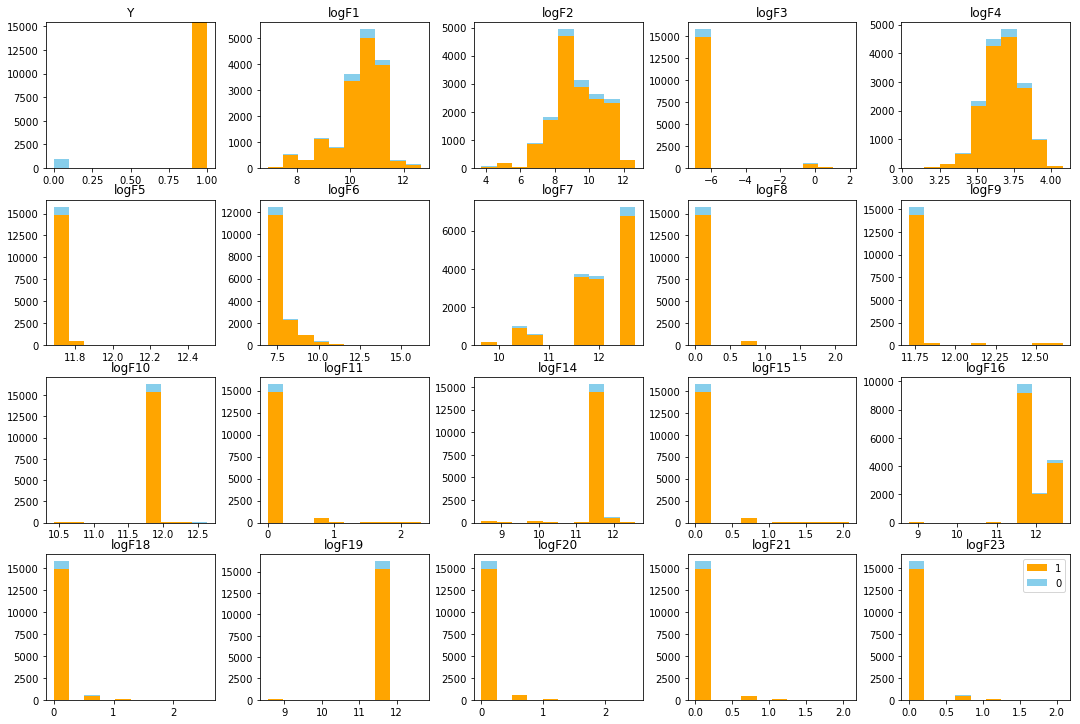

Original Histograms


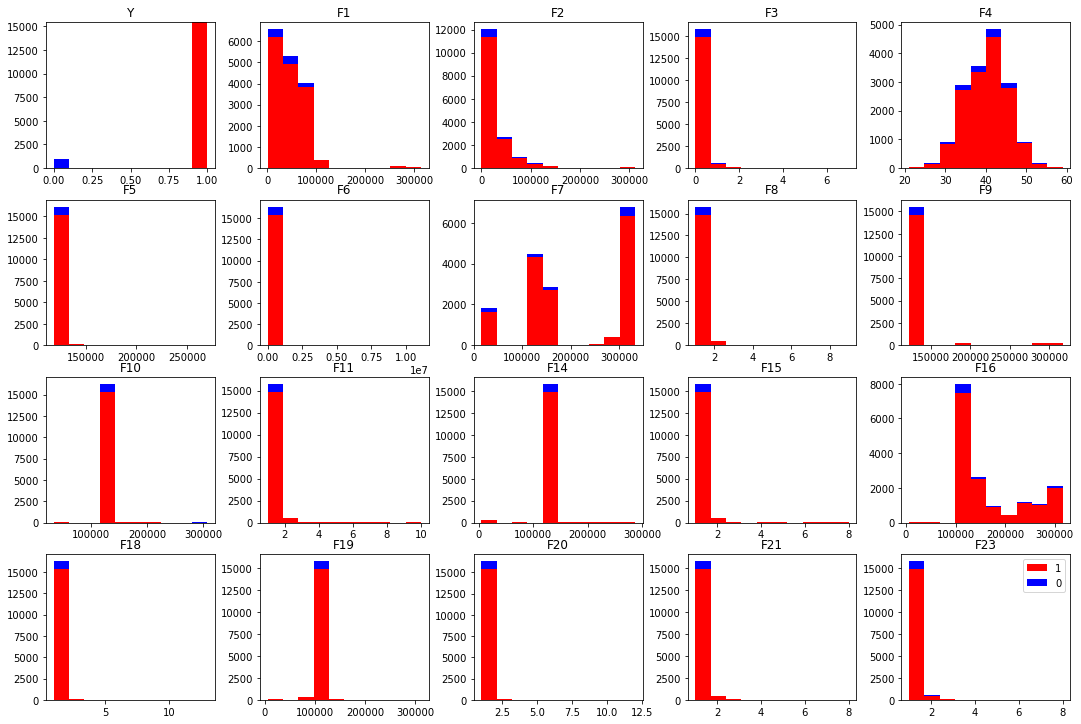

In [12]:
# Take logs
df = pd.DataFrame()
df['Y'] = train.iloc[:, 0]
for i in range(1, len(train.columns)):
    df['log'+train.columns[i]] = np.log(train.iloc[:, i]+0.001)

# Feature log histograms
print('Log Histograms')
f, axarr = plt.subplots(4, 5, figsize=(15, 10))
f.tight_layout()
for i in range(len(df.columns)):
    axarr[int(i/5)][i%5].hist([df[(df['Y'] == 1)].iloc[:, i], df[(df['Y'] == 0)].iloc[:, i]], stacked=True, color=['orange', 'skyblue'], label=['1', '0'])
    axarr[int(i/5)][i%5].set_title(df.columns[i])
    plt.legend()
plt.show()

# Original feature histograms
print('Original Histograms')
f, axarr = plt.subplots(4, 5, figsize=(15, 10))
f.tight_layout()
for i in range(len(train.columns)):
    axarr[int(i/5)][i%5].hist([train[(train['Y'] == 1)].iloc[:, i], train[(train['Y'] == 0)].iloc[:, i]], stacked=True, color=['red', 'blue'], label=['1', '0'])
    axarr[int(i/5)][i%5].set_title(train.columns[i])
    plt.legend()
plt.show()

Potential log features are: **F1, F2, F14, and maybe F6**. These features seem to spread out 0 and 1 when the log is taken .

In [13]:
# Swap out specified features with their log (if chosen)
if 1:
    train['F1_log'] = np.log(train['F1']+0.001)
    train['F2_log'] = np.log(train['F2']+0.001)
    train['F6_log'] = np.log(train['F6']+0.001)
    train['F14_log'] = np.log(train['F14']+0.001)

    test['F1_log'] = np.log(test['F1']+0.001)
    test['F2_log'] = np.log(test['F2']+0.001)
    test['F6_log'] = np.log(test['F6']+0.001)
    test['F14_log'] = np.log(test['F14']+0.001)

    # Drop old columns
    drop_cols = ['F1', 'F2', 'F6', 'F14']
    train = train.drop(drop_cols, axis=1)
    test = test.drop(drop_cols, axis=1)

### Potential Categorical Variables

In [14]:
# Look for possible categorical variables encoded numerically
print(train.shape)
display(train.head())

(16383, 20)


,Y,F3,F4,F5,F7,F8,F9,F10,F11,F15,F16,F18,F19,F20,F21,F23,F1_log,F2_log,F6_log,F14_log
id,,,,,,,,,,,,,,,,,,,,
1,1,0,38,118751,32020,1,121980,127959,1,1,119757,1,118830,1,1,1,10.564447,11.024921,6.907756,11.678296
2,1,0,41,120800,130630,1,124029,128342,2,1,138110,1,118832,1,1,1,10.441383,10.846011,6.907756,11.710283
3,1,0,50,118779,303218,2,122006,128299,1,1,119777,1,118832,1,2,1,9.669662,8.616496,6.907756,11.683385
4,1,0,45,123163,19024,1,126391,127968,1,2,270637,1,118832,1,1,1,9.873904,8.817890,7.600903,8.824090
5,1,0,41,119193,303218,1,122422,128299,1,1,119777,1,118832,1,1,1,10.648325,9.740439,6.907756,11.736173


It looks like **F3, F8, F11, F15, F18, F20, F21, and F23** are possibly numerically encoded categoricals

In [15]:
# Take a closer look
print('{}\n'.format(train['F3'].value_counts()))
print('{}\n'.format(train['F8'].value_counts()))
print('{}\n'.format(train['F11'].value_counts()))
print('{}\n'.format(train['F15'].value_counts()))
print('{}\n'.format(train['F18'].value_counts()))
print('{}\n'.format(train['F20'].value_counts()))
print('{}\n'.format(train['F21'].value_counts()))
print('{}\n'.format(train['F23'].value_counts()))

0    15755
1      508
2       89
3       18
4        7
5        4
7        2
Name: F3, dtype: int64

1    15786
2      520
3       56
4       14
5        4
6        2
9        1
Name: F8, dtype: int64

1     15761
2       519
3        79
4        14
5         4
6         2
8         2
7         1
10        1
Name: F11, dtype: int64

1    15788
2      497
3       66
4       19
5        6
6        3
7        2
8        2
Name: F15, dtype: int64

1     15773
2       508
3        70
4        18
5         8
6         3
7         2
13        1
Name: F18, dtype: int64

1     15779
2       521
3        69
4        10
5         3
12        1
Name: F20, dtype: int64

1    15824
2      466
3       62
4       16
5        9
6        3
8        2
7        1
Name: F21, dtype: int64

1    15803
2      496
3       68
4        8
5        5
7        1
6        1
8        1
Name: F23, dtype: int64



**Options: **  
F3, F8, F11, F15, F18, F20, F21, F23

**Oddities:**  
F3 is the only one to start from 0, all else start from 1.  
F3 has 2 hanging 7 terms  
F8 has a hanging 9 term  
F11 has a hanging 10 term  
F18 has a hanging 13 term  
F20 has a hanging 12 term  

**Definite possibilities: **  
F15, F21, F23 

The oddities could potentially by outliers, so let's go ahead and try breaking them all up into dummy variables.

In [16]:
# Dummy encode specified variables
dummy_cols = ['F3', 'F8', 'F11', 'F15', 'F18', 'F20', 'F21', 'F23']
train = pd.get_dummies(train, columns=dummy_cols)
test = pd.get_dummies(test, columns=dummy_cols)

In [17]:
# Remove any dummy encoded variables that are not found in both train and test
train_drop_cols = list(np.setdiff1d(list(train), list(test))) # things in train not in test
test_drop_cols = list(np.setdiff1d(list(test), list(train))) # things in test not in train
train_drop_cols.remove('Y')

train = train.drop(train_drop_cols, axis=1)
test = test.drop(test_drop_cols, axis=1)

Now that the features have been manipulated by dummy encoding and logarithms, we can add the chosen multiplication features.

In [18]:
# Add the feature multiplications found earlier (if activated)
if 0:
    train = train.join(train_mult_df[high_corr.index.drop('Y')])
    test = test.join(test_mult_df[high_corr.index.drop('Y')])

    display(train.head())
    display(test.head())
#train = train.join(train_mult_df.drop('Y', axis=1))
#test = test.join(test_mult_df)

We will now split the training data into features and labels.

In [19]:
# Split into data and labels
X = train.drop('Y', axis=1)
y = train['Y']

In [20]:
# See what training data looks like
display(X.head(10))

,F4,F5,F7,F9,F10,F16,F19,F1_log,F2_log,F6_log,...,F21_6,F21_8,F23_1,F23_2,F23_3,F23_4,F23_5,F23_6,F23_7,F23_8
id,,,,,,,,,,,,,,,,,,,,,
1,38,118751,32020,121980,127959,119757,118830,10.564447,11.024921,6.907756,...,0,0,1,0,0,0,0,0,0,0
2,41,120800,130630,124029,128342,138110,118832,10.441383,10.846011,6.907756,...,0,0,1,0,0,0,0,0,0,0
3,50,118779,303218,122006,128299,119777,118832,9.669662,8.616496,6.907756,...,0,0,1,0,0,0,0,0,0,0
4,45,123163,19024,126391,127968,270637,118832,9.873904,8.817890,7.600903,...,0,0,1,0,0,0,0,0,0,0
5,41,119193,303218,122422,128299,119777,118832,10.648325,9.740439,6.907756,...,0,0,1,0,0,0,0,0,0,0
6,43,120061,142803,123640,138314,184371,120057,11.301179,9.951611,7.600903,...,0,0,1,0,0,0,0,0,0,0
7,40,120822,303218,124050,127961,131956,118832,9.670988,10.884742,6.907756,...,0,0,1,0,0,0,0,0,0,0
8,44,118779,303218,122006,128342,119777,118832,10.652448,8.445912,6.907756,...,0,0,1,0,0,0,0,0,0,0
9,48,120064,315517,123643,138325,121648,119703,11.275632,10.651762,7.600903,...,0,0,1,0,0,0,0,0,0,0


### Principle Component Analysis

[ 0.64706325]
Percentage of variance explained by 1 component(s): 0.6470632536344615


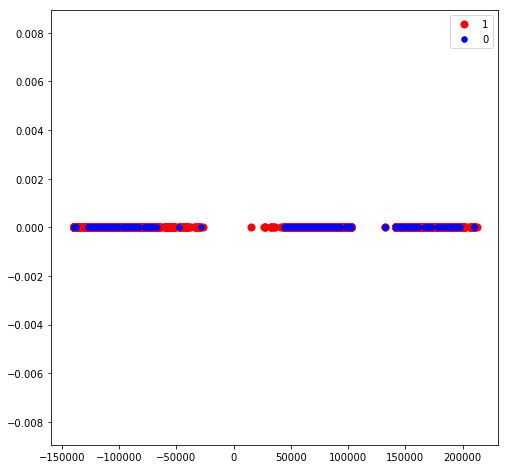

In [21]:
from sklearn.decomposition import PCA

n_components = 1
clf = PCA(n_components)
clf.fit(X)
print(clf.explained_variance_ratio_)
print('Percentage of variance explained by {} component(s): {}'.format(n_components, sum(clf.explained_variance_ratio_)))
X_proj = clf.transform(X)

# Plot projection of samples
X_pos = X_proj[(train['Y'] == 1)]
X_neg = X_proj[(train['Y'] == 0)]
fig = plt.figure(figsize=(8,8))
plt.scatter(X_pos, np.zeros(len(X_pos)), s=50, c='red', label='1')
plt.scatter(X_neg, np.zeros(len(X_neg)), s=30, c='blue', label='0')
plt.legend()
plt.show()

# Add PCA to data if activated
if 0:
    X['PCA'] = X_proj
    test_proj = clf.fit_transform(test)
    test['PCA'] = test_proj

### Linear Discriminant Analysis

/Users/Koger/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


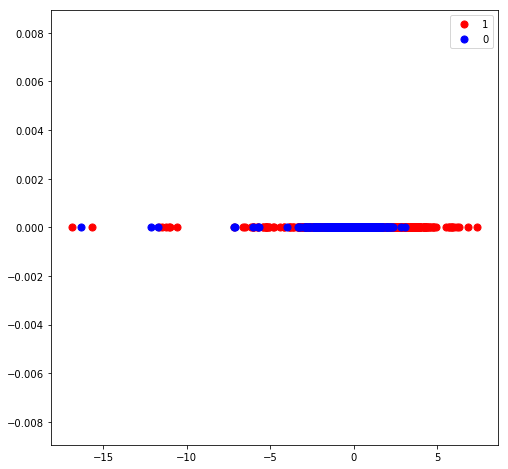

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
X_proj = clf.transform(X)

# Plot projection of samples
X_pos = X_proj[(train['Y'] == 1)]
X_neg = X_proj[(train['Y'] == 0)]
fig = plt.figure(figsize=(8,8))
plt.scatter(X_pos, np.zeros(len(X_pos)), s=50, c='red', label='1')
plt.scatter(X_neg, np.zeros(len(X_neg)), s=50, c='blue', label='0')
plt.legend()
plt.show()

Neither dimensionality reduction technique seems to help much. We could potentially add our 1 dimensional PCA as an additional feature however since it seems to group all of the 0s tightly.

**Update:** Now that we have done some feature engineering like dummy encoding and taking the log of some features, PCA no longer tightly groups the 0s.

## Now let's apply some models.

In [23]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn import tree
from xgboost import XGBRegressor
from xgboost import XGBClassifier

/Users/Koger/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Regressions  
To feel out the data and how it responds to models, I started by throwing Ridge, Lasso, and Logistic regressions at it using CV to find optimal parameters. On average they achieved an AUC score of 0.54, not something particularly impressive. They were not used further after a few initial submissions.

#### *Ridge Regression*

In [24]:
# Parameters
alphas =  10**np.linspace(10,-2,100)*0.5
tuned_parameters = [{'alpha': alphas}]
n_folds = 10

# Setup model
clf = GridSearchCV(linear_model.Ridge(), tuned_parameters, cv=n_folds, scoring='roc_auc')
clf.fit(X, y)
best_alpha = clf.best_params_['alpha']

# Apply model
y_train_pred = clf.predict(X)
y_pred = clf.predict(test)
mse = mean_squared_error(y, y_train_pred)

# Results
print('--- RIDGE REGRESSION ---')
print('best alpha for ridge:', best_alpha)
print('MSE predicting on training data: {}'.format(mse))
print('AUC predicting on training data: {}'.format(roc_auc_score(y, y_train_pred)))
print(y_train_pred)
print(y_pred)

--- RIDGE REGRESSION ---
best alpha for ridge: 5748.78497699
MSE predicting on training data: 0.05495832039495514
AUC predicting on training data: 0.5690742647726929
[ 0.93172459  0.93562106  0.94765059 ...,  0.93526634  0.95826386
  0.95995758]
[ 0.92457814  0.92984219  0.92848465 ...,  0.93352354  0.93215175
  0.94411093]


In [25]:
# Export ridge results to csv
df = pd.DataFrame({'id': test.index.values, 'Y': y_pred})
df.to_csv('submissions/ridge_submission.csv', columns = ['id','Y'], index=False)

#### *Lasso Regression*

In [26]:
# Parameters
alphas =  10**np.linspace(10,-2,100)*0.5
tuned_parameters = [{'alpha': alphas}]
n_folds = 10

# Setup model
clf = GridSearchCV(linear_model.Lasso(), tuned_parameters, cv=n_folds, scoring='roc_auc')
clf.fit(X, y)
best_alpha = clf.best_params_['alpha']

# Apply model
y_train_pred = clf.predict(X)
mse = mean_squared_error(y, y_train_pred)
y_pred = clf.predict(test)

# Results
print('--- LASSO REGRESSION ---')
print('best alpha for lasso:', best_alpha)
print('MSE predicting on training data: {}'.format(mse))
print('AUC predicting on training data: {}'.format(roc_auc_score(y, y_train_pred)))
print(y_train_pred)
print(y_pred)

--- LASSO REGRESSION ---
best alpha for lasso: 0.005
MSE predicting on training data: 0.054994160329660986
AUC predicting on training data: 0.563289095660677
[ 0.93576409  0.93899024  0.94652749 ...,  0.93599795  0.95473463
  0.95666157]
[ 0.92456656  0.92940188  0.93761776 ...,  0.93634311  0.9357493
  0.94324227]


In [27]:
# Export lasso results to csv
df = pd.DataFrame({'id': test.index.values, 'Y': y_pred})
df.to_csv('submissions/lasso_submission.csv', columns = ['id','Y'], index=False)

#### *Logistic Regression*

In [28]:
# Parameters
C = [0.01, 0.1, 1, 10 ,100]
tuned_parameters = [{'C': C}]
n_folds = 10

# Setup model
clf = GridSearchCV(linear_model.LogisticRegression(), tuned_parameters, cv=n_folds, scoring='roc_auc')
clf.fit(X,y)
best_c = clf.best_params_['C']

# Apply model
y_train_pred = clf.predict(X)
mse = mean_squared_error(y, y_train_pred)
y_pred = clf.predict(test)

# Results
print('--- LASSO REGRESSION ---')
print('best C for logistic regression:', best_c)
print('MSE predicting on training data: {}'.format(mse))
print('AUC predicting on training data: {}'.format(roc_auc_score(y, y_train_pred)))
print(y_train_pred)
print(y_pred)

--- LASSO REGRESSION ---
best C for logistic regression: 0.01
MSE predicting on training data: 0.05853628761521089
AUC predicting on training data: 0.5
[1 1 1 ..., 1 1 1]
[1 1 1 ..., 1 1 1]


In [29]:
# Export logistic regression results to csv
df = pd.DataFrame({'id': test.index.values, 'Y': y_pred})
df.to_csv('submissions/logistic_submission.csv', columns = ['id','Y'], index=False)

### Binary Decision Tree  

The binary decision tree resulted in an AUC score of .63, decently better than the regression models. Since the model defaults to predicting classifications as opposed to probabilities, I had to make a custom scorer function so that the crossfold validation would try to maximize AUC.

In [30]:
# Parameters
parameters = {'max_depth':range(3,20)}
n_folds = 10

def my_scorer(clf, X, y_true):
    class_labels = clf.classes_
    y_pred_proba = clf.predict_proba(X)
    error = roc_auc_score(y_true, clf.predict_proba(X)[:,1])
    return error

# Setup model
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv=n_folds, scoring=my_scorer)
clf.fit(X, y)

# Apply model
y_train_pred = clf.predict_proba(X)[:,1]
mse = mean_squared_error(y, y_train_pred)
y_pred = clf.predict_proba(test)[:,1]

# Results
print('--- DECISION TREE ---')
print (clf.best_score_, clf.best_params_)
print('MSE predicting on training data: {}'.format(mse))
print('AUC predicting on training data: {}'.format(roc_auc_score(y, y_train_pred)))
print(y_train_pred)
print(y_pred)

--- DECISION TREE ---
0.635124283991 {'max_depth': 13}
MSE predicting on training data: 0.030850965566931007
AUC predicting on training data: 0.8997001409447082
[ 0.87719298  0.96682927  0.94871795 ...,  0.90909091  0.99123576
  0.96682927]
[ 0.99123576  0.625       0.85263158 ...,  0.99324324  1.          1.        ]


In [31]:
# Export decision tree classifier results to csv
df = pd.DataFrame({'id': test.index.values, 'Y': y_pred})
df.to_csv('submissions/tree_submission.csv', columns = ['id','Y'], index=False)

Since the results were better than the other models, I decided to add the BDT probability predictions as a feature in order to help train other models. Ultimately this didn't increase my submission score, so it was removed from the final model.

In [32]:
# Add results to data for to train other models
if 0:
    X['BDT'] = y_train_pred
    test['BDT'] = y_pred

### MLP Neural Net  

The MLP Neural Net took quite some time to train (5 > hours), and resulted in a AUC score of around 66%. This performed better than the regression models and similar to the binary decision tree. Similarly to the binary decision tree, a custom scorer had to be used to maximize AUC within the cross validation. Gridsearch CV was initially used, but since it took so long the best parameters were then recorded and input manually while I did some feature engineering.

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  

def my_scorer(clf, X, y_true):
    class_labels = clf.classes_
    y_pred_proba = clf.predict_proba(X)
    error = roc_auc_score(y_true, clf.predict_proba(X)[:,1])
    return error

# Parameters
n_folds = 10
parameters = {
'learning_rate': ["constant", "invscaling", "adaptive"],
'hidden_layer_sizes': [(5,2), (4,4), (7,2), (7,3), (7,5), (7,6), (7,7), (7,8), (7,9), (7,2), (8,3), (8,5), (8,6), (8,7), (8,8), (8,9)],
'alpha': 10.0 ** -np.arange(1, 7),
'activation': ["logistic", "relu", "tanh"]
}

# Normalize data (this was recommended for MLP somewhere...)
scaler = StandardScaler()  
scaler.fit(X) 

# Setup model
#clf = GridSearchCV(MLPClassifier(), parameters, cv=n_folds, scoring=my_scorer)
clf = MLPClassifier(learning_rate='invscaling', hidden_layer_sizes=(7,9), activation='tanh', alpha=.00001) # Best params
start_time = time.time()
clf.fit(scaler.transform(X), y)
clf_fit_time = (time.time() - start_time)
print("MLP train time : {:.5f}".format(clf_fit_time))

MLP train time : 3.37386


In [34]:
# Apply model
y_train_pred = clf.predict_proba(scaler.transform(X))[:,1]
mse = mean_squared_error(y, y_train_pred)
y_pred = clf.predict_proba(scaler.transform(test))[:,1]

# Results
print('--- MLP NEURAL NET ---')
#print (clf.best_score_, clf.best_params_)
print('MSE predicting on training data: {}'.format(mse))
print('AUC predicting on training data: {}'.format(roc_auc_score(y, y_train_pred)))
print(y_train_pred)
print(y_pred)

--- MLP NEURAL NET ---
MSE predicting on training data: 0.0538934693295194
AUC predicting on training data: 0.6587048365776937
[ 0.88147928  0.92878852  0.96004595 ...,  0.92542768  0.96986899
  0.96434239]
[ 0.92936912  0.95745874  0.88644245 ...,  0.83114225  0.94744874
  0.93369109]


In [35]:
# Export MLP Neural Net results to csv
df = pd.DataFrame({'id': test.index.values, 'Y': y_pred})
df.to_csv('submissions/mlp_submission.csv', columns = ['id','Y'], index=False)

Since the MLP results were better than the other models (like the BDT), I also decided to add the MLP probability predictions as a feature in order to help train future models. Ultimately this didn't increase my submission score, so it was removed from the final model.

In [36]:
# Add results to data for to train other models (if activated)
if 0:
    X['MLP'] = y_train_pred
    test['MLP'] = y_pred

### XGBoost  

XGBoost resulted in the best results, averaging in submission scores > .70 for the AUC. Gridsearch CV with a wide array was initially used, but the best hyperparameters seemed pretty similar even after doing some feature engineering. The best parameters were recorded and manually input during further feature engineering to save time.

In [41]:
# Parameters
max_depth = [3, 6, 9]
min_child_weight = [0.1, 0.5, 1, 2, 5]
gamma = [0, 1, 10]
subsample = [0.5, 1]
learning_rate = [0.01, 0.05, 0.2] 
n_estimators = [100, 200]
subsample = [0.5, 1]
colsample_bytree = [0.5, 1]

# Setup model
parameters = {'subsample':subsample, 'colsample_bytree':colsample_bytree, 'learning_rate':learning_rate, 'max_depth':max_depth, 'gamma':gamma, 'learning_rate':learning_rate, 'min_child_weight':min_child_weight, 'subsample':subsample, 'n_estimators':n_estimators}
#clf = GridSearchCV(XGBRegressor(), parameters, scoring='roc_auc')
clf = XGBRegressor(colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=9, min_child_weight=5, n_estimators=200, subsample=1)

# Train classifier with time
start_time = time.time()
clf.fit(X, y)
clf_fit_time = (time.time() - start_time)
print("XGBoost train time : {:.5f}".format(clf_fit_time))

XGBoost train time : 4.33618


In [42]:
# Apply model
y_train_pred = clf.predict(X)
mse = mean_squared_error(y, y_train_pred)
y_pred = clf.predict(test)

# Results
print('--- XGBOOST ---')
#print (clf.best_score_, clf.best_params_)
print('MSE predicting on training data: {}'.format(mse))
print('AUC predicting on training data: {}'.format(roc_auc_score(y, y_train_pred)))
print(y_train_pred)
print(y_pred)

--- XGBOOST ---
MSE predicting on training data: 0.045058541164395054
AUC predicting on training data: 0.9660076694797919
[ 0.85839486  0.90233409  0.90142226 ...,  0.87875086  0.90663838
  0.89836723]
[ 0.91186094  0.75883567  0.81455821 ...,  0.76686096  0.90673226
  0.89644861]


In [43]:
# Export XGBoost results to csv
df = pd.DataFrame({'id': test.index.values, 'Y': y_pred})
df.to_csv('submissions/xgb_submission.csv', columns = ['id','Y'], index=False)

## Results

**Final Kaggle Score:**  
0.74925  

**Model Used:**  
XGBoost with parameters {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 1} after removing correlated columns, adding the log of F1, F2, F6, and F14 as features, deleting the original F1, F2, F6, and F14 features, and dummy encoding F3, F8, F11, F15, F18, F20, F21, F23.